# Two different robots

The code for this example is implemented [different_robots](https://github.com/jeguzzi/enki_env/tree/main/enki_env/examples/different_robots). Let us import it.

In [3]:
from enki_env.examples import different_robots

## Environment

The environment contains one Thymio and one E-Puck. Otherwise it is very similar to the previous "same robots" example:
same task, same reward, just different robots with (slightly in this case) different sensors.
    

To create the environment via script, run:
```console
python -m enki_env.examples.different_robot.environment
```

RFBOutputContext()


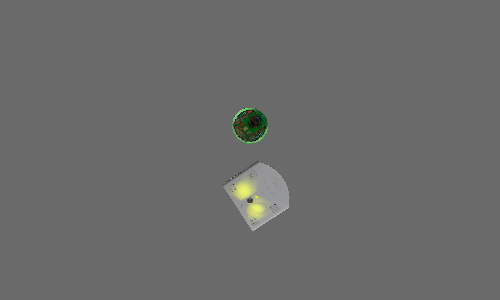

In [4]:
env = different_robots.make_env(render_mode="human")
env.reset()
env.snapshot()

The robots belong to different groups with different observation spaces

In [5]:
env.group_map

{'thymio': ['thymio_0'], 'e-puck': ['e-puck_0']}

In [6]:
env.observation_spaces

{'thymio_0': Dict('prox/value': Box(0.0, 1.0, (7,), float32)),
 'e-puck_0': Dict('prox/value': Box(0.0, 1.0, (8,), float32))}

## Baseline

We adapted the Thymio baseline to work for the E-Puck 

To evaluate the performances of both baselines via script, run:
```console
python -m enki_env.examples.different_robots.baseline
```

In [7]:
import inspect

print(inspect.getsource(different_robots.EPuckBaseline.predict))

    def predict(self,
                observation: Observation,
                state: State | None = None,
                episode_start: EpisodeStart | None = None,
                deterministic: bool = False) -> tuple[Action, State | None]:
        prox = observation['prox/value']
        if any(prox > 0):
            prox = prox / np.max(prox)
            ws = np.array((-0.1, -0.25, -0.5, -1, -1, 0.5, 0.25, 0.1))
            w = np.dot(ws, prox)
        else:
            w = 1
        return np.clip([w], -1, 1), None



To perform a rollout, we need to assign the policy to the whole group.

In [8]:
rollout = env.unwrapped.rollout(max_steps=10, policies={'thymio': different_robots.ThymioBaseline(), 
                                                        'e-puck': different_robots.EPuckBaseline()})

In [9]:
rollout.keys()

dict_keys(['thymio', 'e-puck'])

In [10]:
rollout['thymio'].episode_reward, rollout['e-puck'].episode_reward

(np.float64(-7.15706808638495), np.float64(-15.090982293994138))

## Reinforcement Learning

Let us now train and evaluate *two* RL policies for this task, one for each robot.

To perform this via script, run:
```console
python -m enki_env.examples.different_robots.rl
```

In [11]:
policies = different_robots.get_policies()

In [12]:
policies.keys()

dict_keys(['thymio', 'e-puck'])

In [13]:
rollout = env.unwrapped.rollout(max_steps=10, policies=policies)
rollout['thymio'].episode_reward, rollout['e-puck'].episode_reward

(np.float64(-11.343628388478585), np.float64(-18.515705165901657))

## Video

To conclude, to generate a similar video as before, you can run

```console
python -m enki_env.examples.different_robots.video
```

or run

In [12]:
video = different_robots.make_video()
video.display_in_notebook(fps=30, width=640, rd_kwargs=dict(logger=None))